# Collin Wyer
## Lab 3: Clustering & Manifold Learning


### A. Import Python Modules and Dataset

In [99]:
# Load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import manifold # needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster # needed for k-Means clustering
from sklearn import preprocessing # needed for scaling attributes to the nterval [0,1]

# Style plot
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('dark_background')

#### Load dataset

In [100]:
df = pd.read_csv("./loans_train_prepared.csv")
data = np.array(df.values, dtype=float)

print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 17)


In [101]:
# explore tail of dataset
df.tail(10).T

,604,605,606,607,608,609,610,611,612,613
Unnamed: 0,604.000000,605.000000,606.000000,607.000000,608.000000,609.000000,610.000000,611.000000,612.000000,613.000000
Dependents,0.333333,0.000000,0.333333,0.666667,0.000000,0.000000,1.000000,0.333333,0.666667,0.000000
ApplicantIncome,1.622619,0.574281,0.750761,0.841486,0.723205,0.666409,0.858916,1.313719,1.267616,0.925883
LoanAmount,2.146566,0.962197,1.266292,1.193805,0.932134,0.676143,0.395858,1.566110,1.325676,1.074155
Loan_Amount_Term,0.750000,0.375000,0.750000,0.750000,0.750000,0.750000,0.375000,0.750000,0.750000,0.750000
Credit_History,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
Gender_Male,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
Gender_nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Married_Yes,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
Married_nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


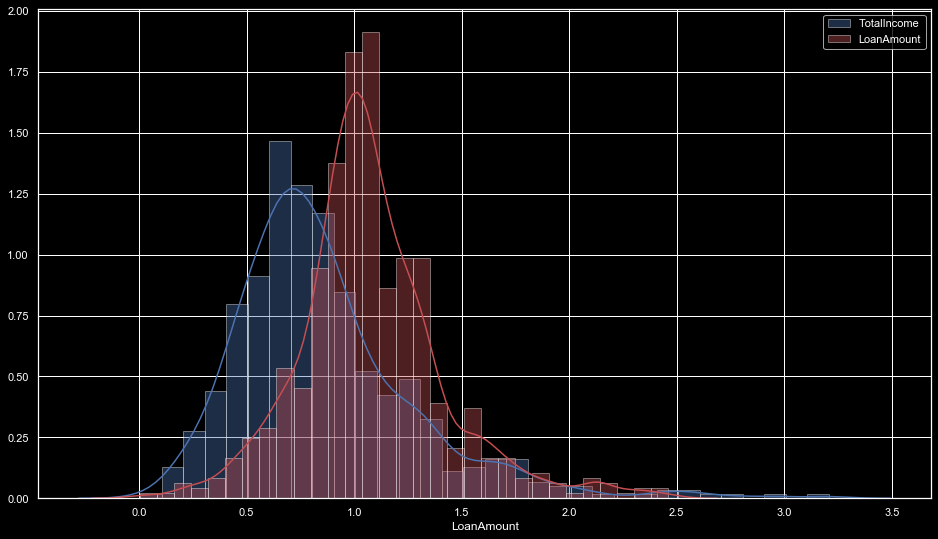

In [102]:
# Visualize some of the data - displot
plot_income = sns.distplot(df["TotalIncome"], color='b', label= "TotalIncome")
plot_spend = sns.distplot(df["LoanAmount"], color = 'r', label= "LoanAmount")
plt.legend()
plt.show()

### B. Rescale the Data
Here we rescale the values in each column to the interval $[0,1]$ with MinMaxScaler. Please note that if your dataset is already prepared for ML there is no need to rescale it again. See https://scikit-learn.org/stable/modules/preprocessing.html for alternative rescaling techniques. In your work on this exercise experiment with other rescaling techniques to see if they lead to a more insightful clustering.


# ##### CHECK ALTRENATIVE RESCALING ######

In [103]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

### C. Scatterplot Function for visualization

`clustering_scatterplot()` creates the 2D scatter plot of the clustered dataset.

In [143]:
colors = np.array(['orange', 'green', 'pink', 'blue', 'khaki', 'purple', 'lime', 'red'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the center of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='lime', marker='s', s=200)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### D. K-Means Clustering

#### Deciding on the optimum # of clusters 'K'

K=(n) determines the number of clusters and is derived using the concept of minimizing within cluster sum of square (WCSS).
As K increases WCSS decreases and results in a scree plot with an elbow effect. The # of clusters at the elbow generally gives a good indication of the optimum # of clusters 

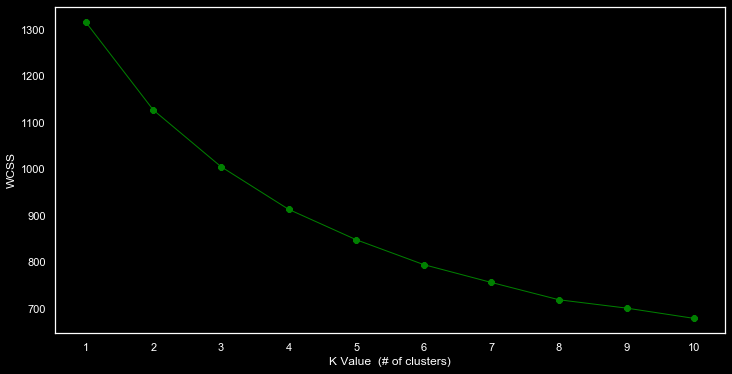

In [105]:
#from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=1, c="green", marker ="8")
plt.xlabel("K Value  (# of clusters)")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

Based on the above elbow plot, 3, 4, or 5 could be chosen as $k$. 

Number of clusters $k$.

In [106]:
k= 5

#### Run k-Means

In [107]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

### E. Apply a manifold-learning technique to project the data set to a 2D space


Append the cluster centers to the dataset.

In [108]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

#### E1. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

Project both the data and the k-Means cluster centers to 2D.

In [117]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

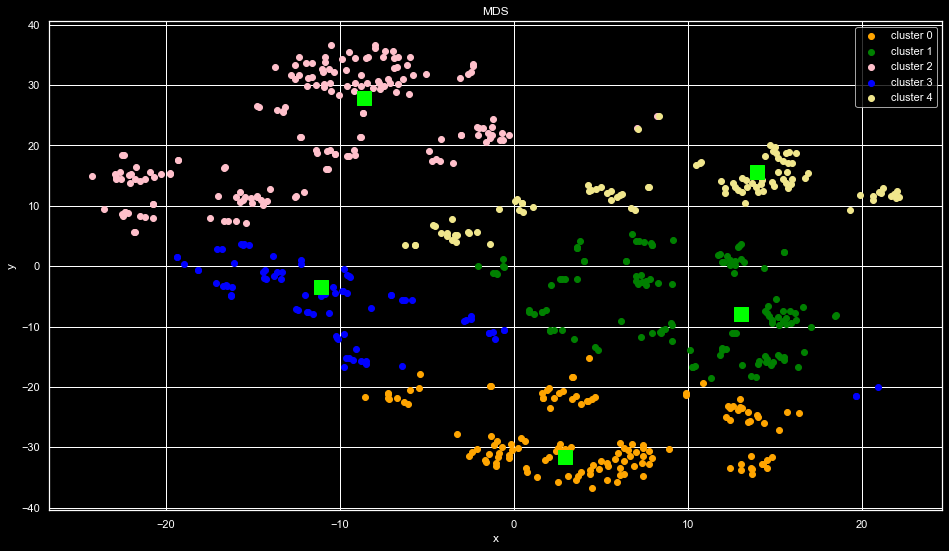

In [148]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

#### E2. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

Project both the data and the k-Means cluster centers to 2D.

In [149]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

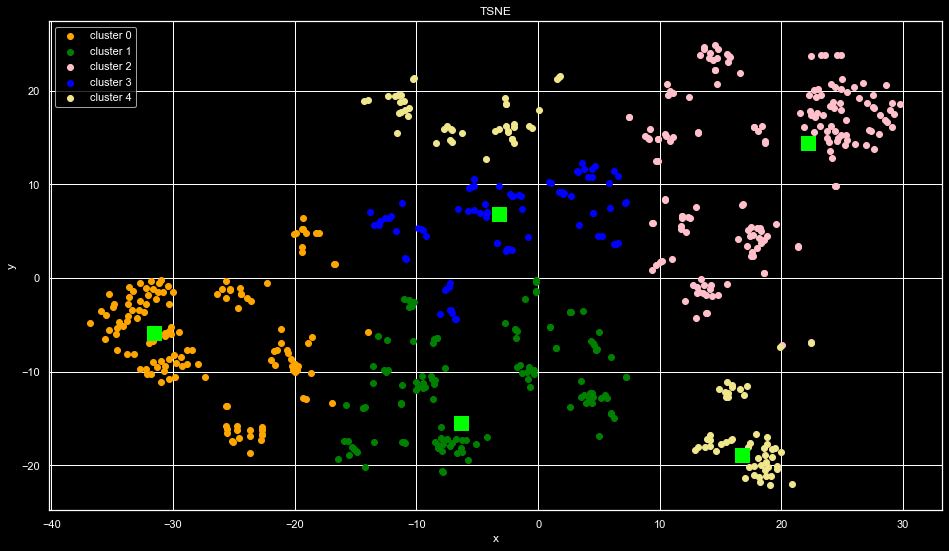

In [150]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

### F. Cluster Analysis

#### Add the cluster labels as an extra column in the original dataframe

In [123]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [124]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0.000000,1.000000,2.000000,3.000000,4.000000
Dependents,0.000000,0.333333,0.000000,0.000000,0.000000
ApplicantIncome,1.084523,0.925883,0.683858,0.608992,1.101869
LoanAmount,1.058140,1.047319,0.635920,1.002824,1.115650
Loan_Amount_Term,0.750000,0.750000,0.750000,0.750000,0.750000
Credit_History,1.000000,1.000000,1.000000,1.000000,1.000000
Gender_Male,1.000000,1.000000,1.000000,1.000000,1.000000
Gender_nan,0.000000,0.000000,0.000000,0.000000,0.000000
Married_Yes,0.000000,1.000000,1.000000,1.000000,0.000000
Married_nan,0.000000,0.000000,0.000000,0.000000,0.000000


In [125]:
df.tail().T

,609,610,611,612,613
Unnamed: 0,609.000000,610.000000,611.000000,612.000000,613.000000
Dependents,0.000000,1.000000,0.333333,0.666667,0.000000
ApplicantIncome,0.666409,0.858916,1.313719,1.267616,0.925883
LoanAmount,0.676143,0.395858,1.566110,1.325676,1.074155
Loan_Amount_Term,0.750000,0.375000,0.750000,0.750000,0.750000
Credit_History,1.000000,1.000000,1.000000,1.000000,0.000000
Gender_Male,0.000000,1.000000,1.000000,1.000000,0.000000
Gender_nan,0.000000,0.000000,0.000000,0.000000,0.000000
Married_Yes,0.000000,1.000000,1.000000,1.000000,0.000000
Married_nan,0.000000,0.000000,0.000000,0.000000,0.000000


#### Compute the mean value of each attribute for each cluster

In [127]:
df.groupby('cluster').mean().T

cluster,0,1,2,3,4
Unnamed: 0,297.266667,321.648438,271.081395,321.951220,349.103093
Dependents,0.308642,0.104167,0.255814,0.268293,0.323024
ApplicantIncome,0.922554,0.927197,0.908651,0.883670,0.936190
LoanAmount,1.119394,1.030551,1.044120,1.067517,1.140688
Loan_Amount_Term,0.720741,0.735547,0.692297,0.721037,0.704639
Credit_History,0.985185,0.976562,0.994186,0.000000,0.989691
Gender_Male,0.844444,0.609375,0.837209,0.768293,0.927835
Gender_nan,0.014815,0.015625,0.017442,0.036585,0.030928
Married_Yes,1.000000,0.000000,0.656977,0.646341,1.000000
Married_nan,0.000000,0.015625,0.005814,0.000000,0.000000


#### Conclusion

By looking at the table above we can argue that:
* Cluster 2 are large iris flowers with the largest petals out of the three types.
* Cluster 0 are iris flowers with small petals (notably smaller than the other two types) but with wide sepals, the widest sepals of all three types. This is also the cluster that is clearly differentiated from the other two clusters in the scatter plots.
* Cluster 1 flowers are slightly smaller than cluster 2 flowers with a most notable difference in the width of the petals.

_Note that this conclusion is true for this run of k-Means. If the code is executed again, k-Means may produce either different clusters or the same clusters but in a different order._

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

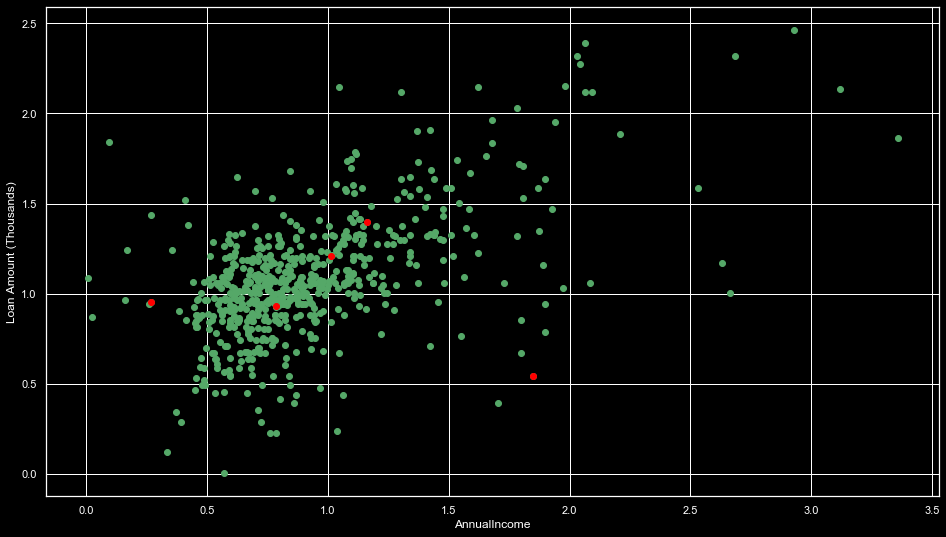

In [131]:
X = df[["LoanAmount","ApplicantIncome"]]

K=5

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='g')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (Thousands)')
plt.show()